                 META   AMAZON      APPLE    NETFLIX     GOOGLE
Date                                                           
2012-05-18  38.230000  10.6925  18.942142   9.994286  15.025025
2012-05-21  34.029999  10.9055  20.045713  10.248571  15.368118
2012-05-22  31.000000  10.7665  19.891787   9.672857  15.035035
2012-05-23  32.000000  10.8640  20.377144  10.272857  15.251752
2012-05-24  33.029999  10.7620  20.190001  10.038571  15.106607


<Figure size 1200x600 with 0 Axes>

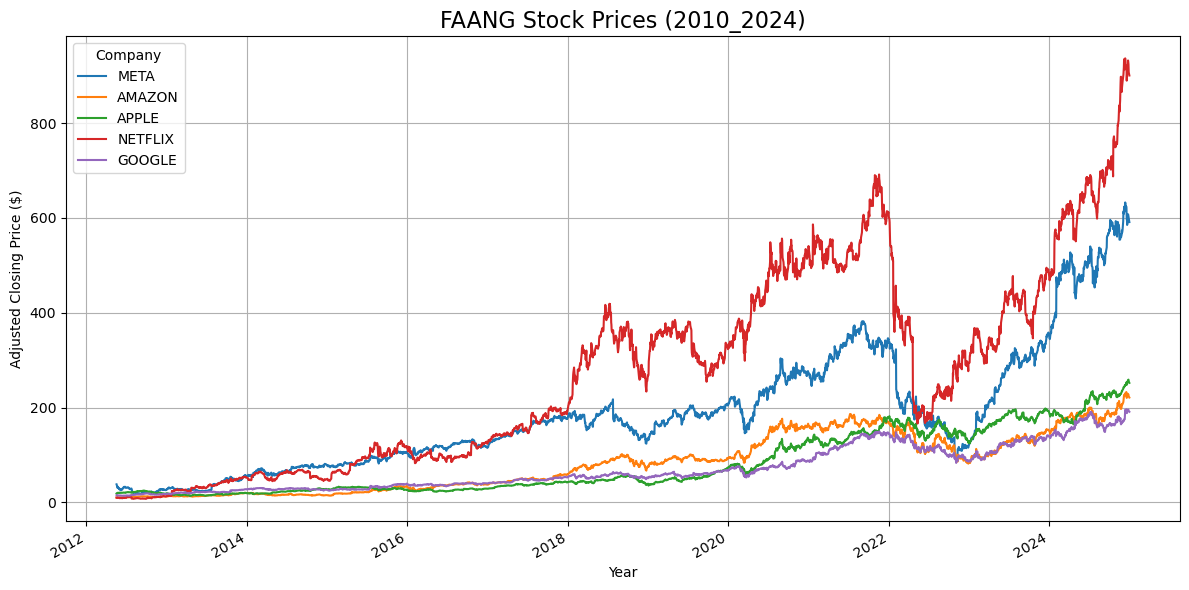

<Figure size 640x480 with 0 Axes>

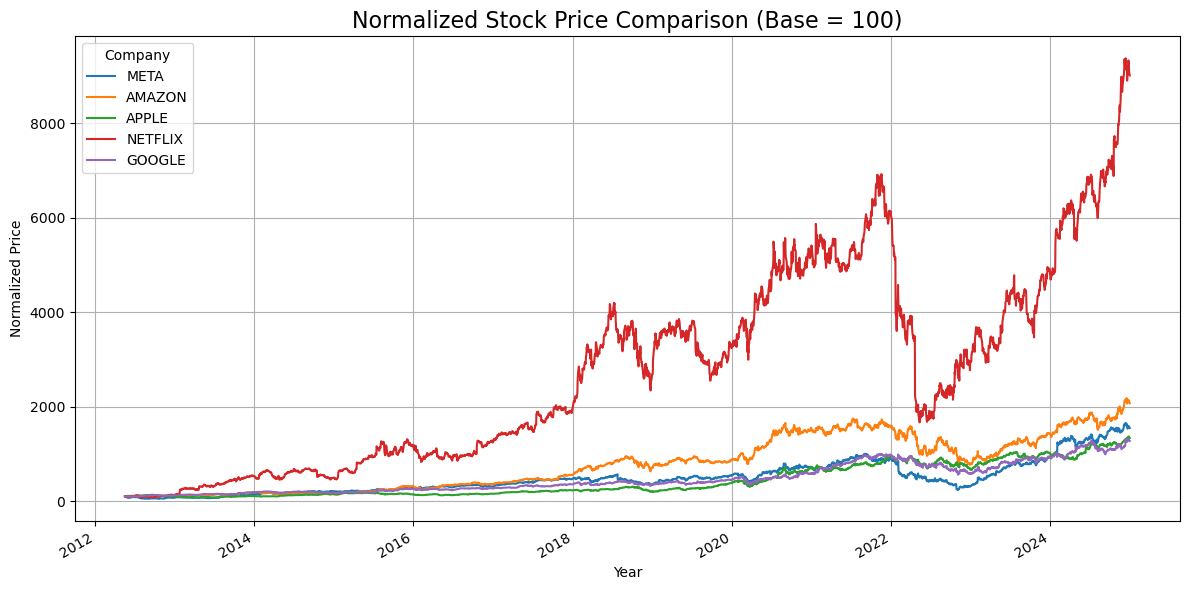

<Figure size 640x480 with 0 Axes>

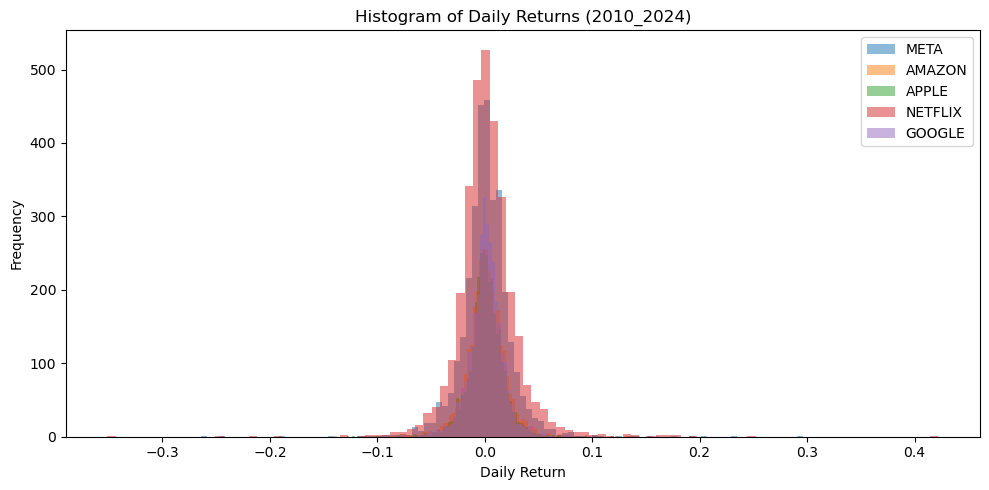

C:\Users\Mayur Nikam\AppData\Local\Temp\ipykernel_19220\1150404808.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df.resample('Y').mean()


<Figure size 640x480 with 0 Axes>

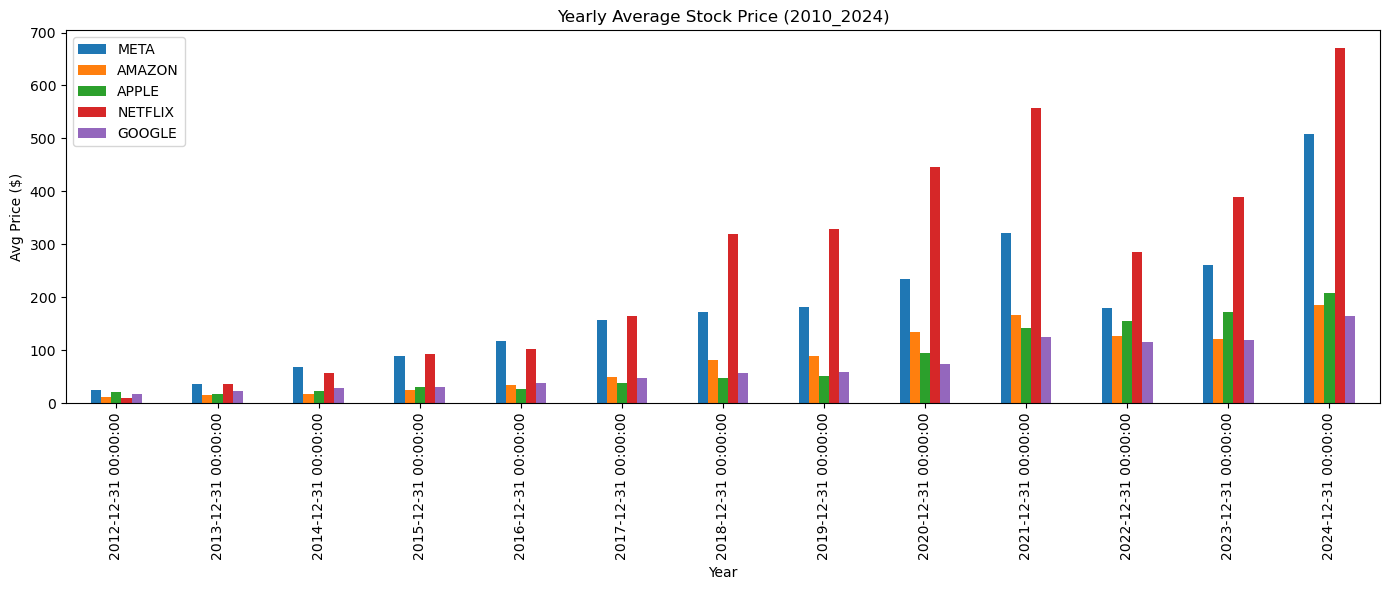

<Figure size 640x480 with 0 Axes>

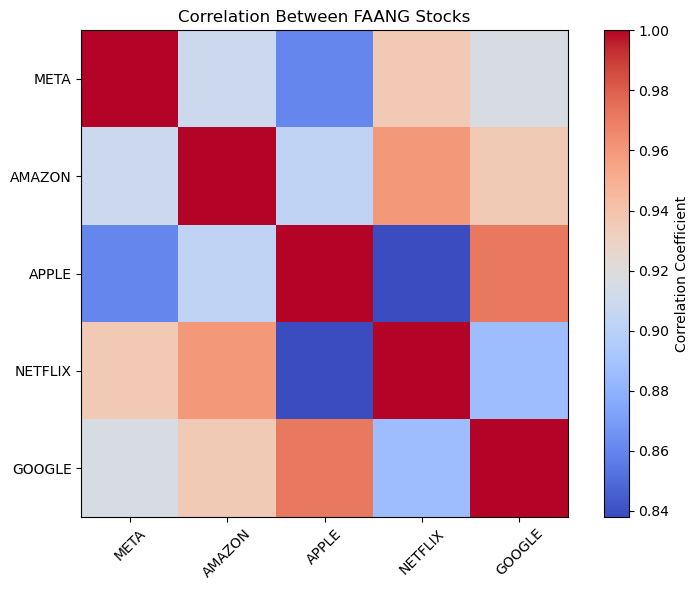

<Figure size 640x480 with 0 Axes>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FAANG_stock_data_2010_2024.csv", parse_dates=['Date'], index_col='Date')
print(df.head())
plt.figure(figsize=(12, 6))
df.plot(figsize=(12, 6))
plt.title("FAANG Stock Prices (2010_2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Adjusted Closing Price ($)")
plt.grid(True)
plt.legend(title="Company")
plt.tight_layout()
plt.show()
plt.savefig('FAANG Stock Prices (2010_2024).png', dpi=300, bbox_inches='tight')

normalized_df = df / df.iloc[0] * 100
normalized_df.plot(figsize=(12, 6))
plt.title("Normalized Stock Price Comparison (Base = 100)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Normalized Price")
plt.grid(True)
plt.legend(title="Company")
plt.tight_layout()
plt.show()
plt.savefig('Normalized Stock Price Comparison (Base = 100).png', dpi=300, bbox_inches='tight')

daily_returns = df.pct_change().dropna()
plt.figure(figsize=(10, 5))
for column in daily_returns.columns:
    plt.hist(daily_returns[column], bins=100, alpha=0.5, label=column)

plt.title("Histogram of Daily Returns (2010_2024)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Histogram of Daily Returns (2010_2024).png', dpi=300, bbox_inches='tight')

yearly_avg = df.resample('Y').mean()
yearly_avg.plot(kind='bar', figsize=(14, 6))
plt.title("Yearly Average Stock Price (2010_2024)")
plt.xlabel("Year")
plt.ylabel("Avg Price ($)")
plt.tight_layout()
plt.show()
plt.savefig('Yearly Average Stock Price (2010_2024).png', dpi=300, bbox_inches='tight')

correlation = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.index)
plt.title("Correlation Between FAANG Stocks")
plt.tight_layout()
plt.show()
plt.savefig('Correlation Between FAANG Stocks.png', dpi=300, bbox_inches='tight')


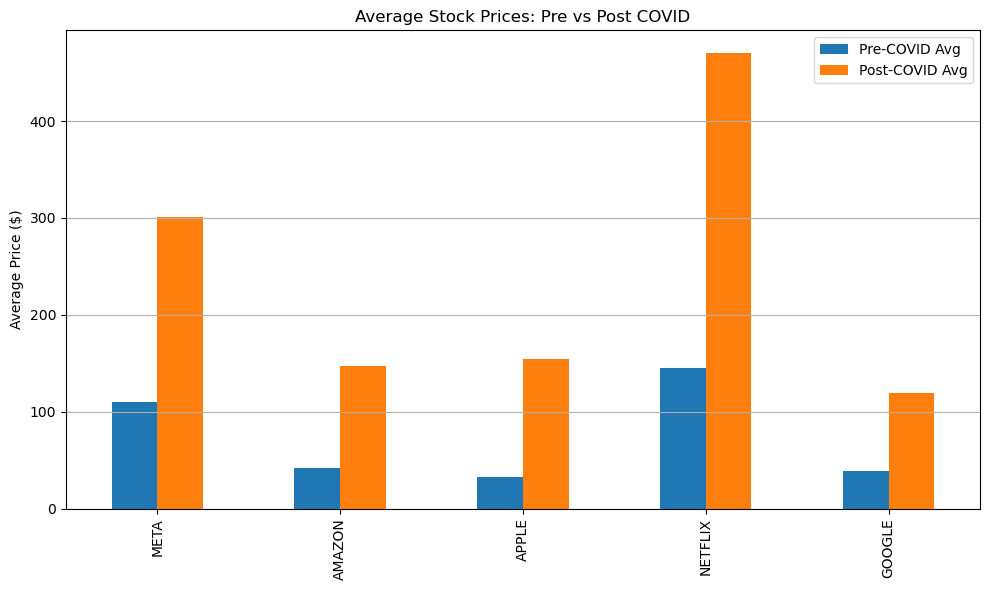

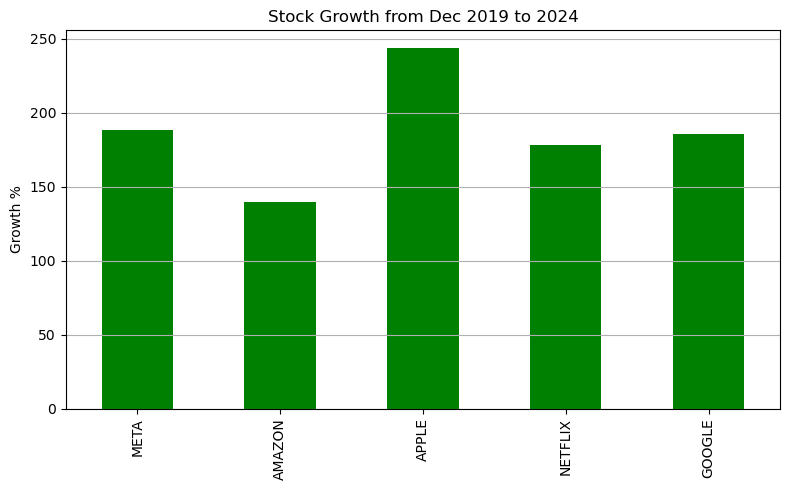

<Figure size 640x480 with 0 Axes>

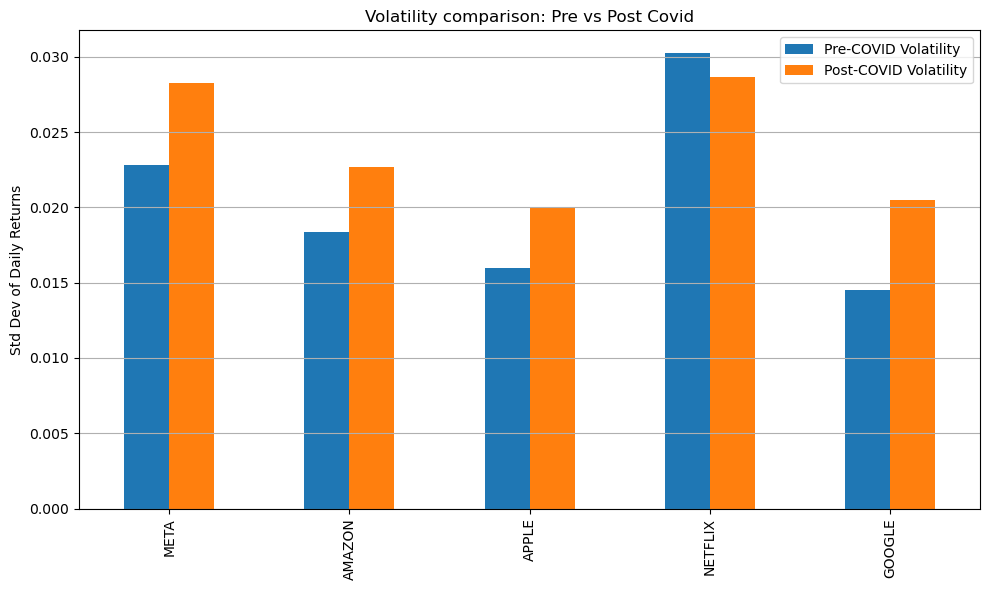

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FAANG_stock_data_2010_2024.csv", parse_dates=['Date'], index_col='Date')
pre_covid = df[df.index < "2020-01-01"]
post_covid = df[df.index >= "2020-01-01"]
pre_avg = pre_covid.mean()
post_avg = post_covid.mean()

compare_df = pd.DataFrame({
    'Pre-COVID Avg': pre_avg,
    'Post-COVID Avg': post_avg
})

compare_df.plot(kind='bar', figsize=(10, 6), title='Average Stock Prices: Pre vs Post COVID')
plt.ylabel("Average Price ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Average Stock Prices: Pre vs Post COVID.png', dpi=300, bbox_inches='tight')

pre_last = df.loc["2019-12-31"]
post_last = df.iloc[-1]
growth = ((post_last - pre_last) / pre_last) * 100
growth.plot(kind='bar', color='green', figsize=(8, 5), title='Stock Growth from Dec 2019 to 2024')
plt.ylabel("Growth %")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Stock Growth from Dec 2019 to 2024.png', dpi=300, bbox_inches='tight')

pre_volatility = pre_covid.pct_change().std()
post_volatility = post_covid.pct_change().std()
vol_df = pd.DataFrame({
    'Pre-COVID Volatility': pre_volatility,
    'Post-COVID Volatility': post_volatility
})

vol_df.plot(kind='bar', figsize=(10, 6), title='Volatility comparison: Pre vs Post Covid')
plt.ylabel("Std Dev of Daily Returns")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Volatility comparison: Pre vs Post Covid.png', dpi=300, bbox_inches='tight')


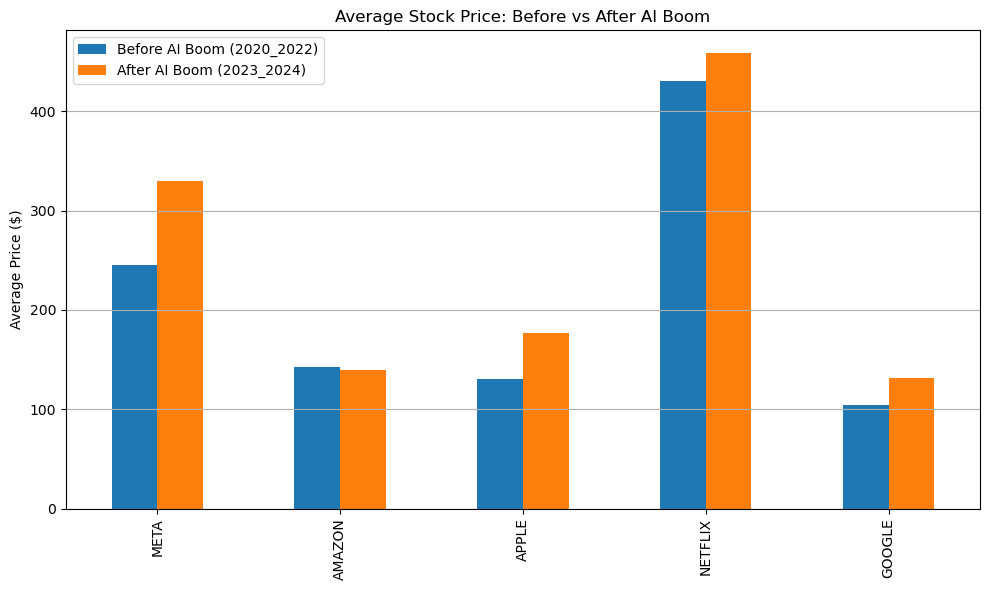

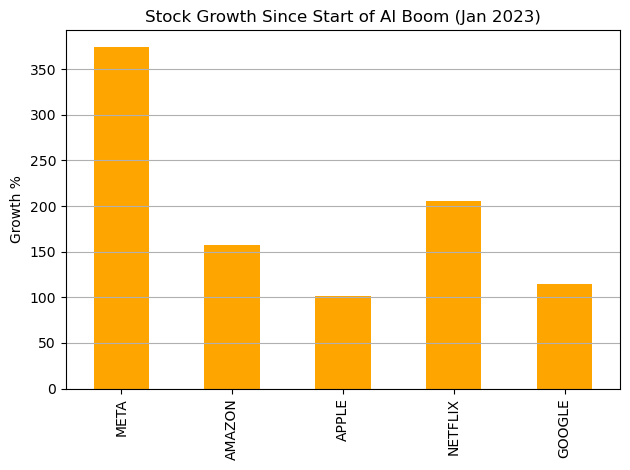

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data
df = pd.read_csv("FAANG_stock_data_2010_2024.csv", parse_dates=['Date'], index_col='Date')
before_ai = df[(df.index >= "2020-01-01") & (df.index <= "2022-12-31")]
after_ai = df[(df.index >= "2023-01-01") & (df.index <= "2024-07-01")]
before_avg = before_ai.mean()
after_avg = after_ai.mean()

avg_df = pd.DataFrame({
    'Before AI Boom (2020_2022)': before_avg,
    'After AI Boom (2023_2024)': after_avg
})

avg_df.plot(kind='bar', figsize=(10, 6), title='Average Stock Price: Before vs After AI Boom')
plt.ylabel("Average Price ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Average Stock Price: Before vs After AI Boom.png', dpi=300, bbox_inches='tight')

jan_2023 = df.loc["2023-01-03"]
latest = df.iloc[-1]

ai_growth = ((latest - jan_2023) / jan_2023) * 100

ai_growth.plot(kind='bar', color='orange', title='Stock Growth Since Start of AI Boom (Jan 2023)')
plt.ylabel("Growth %")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Stock Growth Since Start of AI Boom (Jan 2023).png', dpi=300, bbox_inches='tight')